SVM is supervised ML algorithm, and it is used for regression, classification and outlier detection.

When we are doing classification with SVM, the algorithm assigns new data points to the existing categories/classes.

## Definitions

#### Hyperplane
A hyperplane (line, 2D surface, or 3D surface) is a decision boundary that separates the data points based on their class labels. The SVM classifier separated the data points using a hyperplane with the maximum amount of margin.

#### Support Vectors
The support vectors are the new data points that SVM creates which are the closest ones to the hyperplane. These data points define the separating line or the hyperplane better by calculating margins.

#### Margin
A margin is a separation gap between the two lines on the closest data points. We calculate by the perpendicular distance from the line to the closest support vectors or data points. In SVM, we are trying to maximise the separation gap in order to get the maximum margin.

![img](https://static.wixstatic.com/media/8f929f_7ecacdcf69d2450087cb4a898ef90837~mv2.png)

### How does SVM work?

In SVM, the main objective is find the optimal hyperplane (optimal separation between the several classes) with the maximum possible margin between the support vectors in a given dataset.

SVM searches for the maximum margin hyperplane by following a 2 step process:
- Generate a hyperplane which divides the classes in the best possible way. We are trying to find the best hyperplane that provides maximum separation (=maximum margin) between the two classes.
- We choose the hyperplane so that the the distance between it and the support vectors on each side is maximised. If such hyperplane exists, it is known as the maximum margin hyperplane.

![img](https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg)

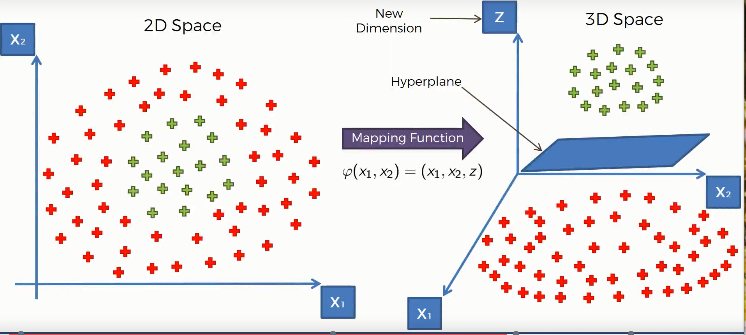



When the data points of a set are very dispersed and it is not possible to separate them linearly, SVM uses a kernel trick that transforms the initial input space into a higher dimension space (2D -> 3D). A mapping function is used, in order for this transformation to happen and add a new dimension.

SVM has 4 popular types of kernels, Linear Kernel, Polynomial kernel, Radial Basis Function (Gaussian) Kernel, Sigmoid Kernel (
https://data-flair.training/blogs/svm-kernel-functions/)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import svm

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Exam 1 marks      100 non-null    float64
 1   Exam 2 marks      100 non-null    float64
 2   Admission status  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df_admitted = df[ df['Admission status'] == 1 ]
print(f"Training samples with admission status 1 = {df_admitted.shape[0]}")

Training samples with admission status 1 = 60


In [ ]:
df_nonadmitted = df[ df['Admission status'] == 0 ]
print(f"Training samples with admission status 0 = {df_nonadmitted.shape[0]}")

Training samples with admission status 0 = 40


In [ ]:
def plot_data():
  plt.scatter(df_admitted['Exam 1 marks'], df_admitted['Exam 2 marks'], color='g', label='Admitted Students')
  plt.scatter(df_nonadmitted['Exam 1 marks'], df_nonadmitted['Exam 2 marks'], color='r', label='Non-Admitted Students')
  plt.xlabel('Exam 1 marks')
  plt.ylabel('Exam 2 marks')
  plt.legend()
  plt.title('Admitted VS Non-Admitted Students based on their Marks')


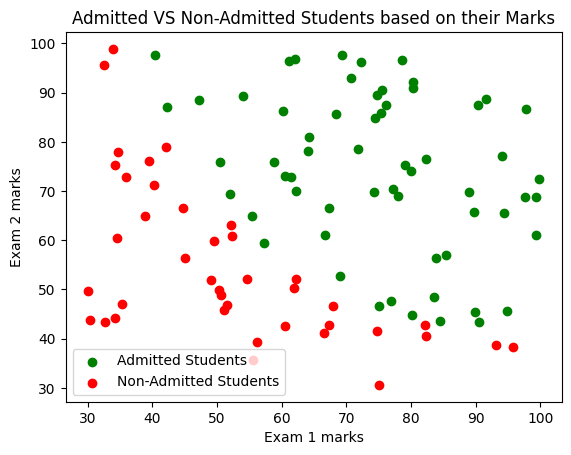

In [ ]:
plot_data()

In [ ]:
X = df[['Exam 1 marks', 'Exam 2 marks']]
y = df['Admission status']

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
model = svm.SVC() # default parameters for svm
model.fit(X_train, y_train)
print('Model score using default parameters', 100*model.score(X_test, y_test), '%')

Model score using default parameters 85.0 %


In [ ]:
def plot_sv(model):
  clf = model
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  xx = np.linspace(xlim[0], xlim[1])
  yy = np.linspace(ylim[0], ylim[1])
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = clf.decision_function(xy).reshape(XX.shape)

  ax.contour(XX, YY, Z, color='k', alpha=0.5, linestyles=['--','-','--'], levels=[-1,0,1])
  ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100, facecolors='none', edgecolors='k')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-24-9af418dc1f5d>:13: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(XX, YY, Z, color='k', alpha=0.5, linestyles=['--','-','--'], levels=[-1,0,1])


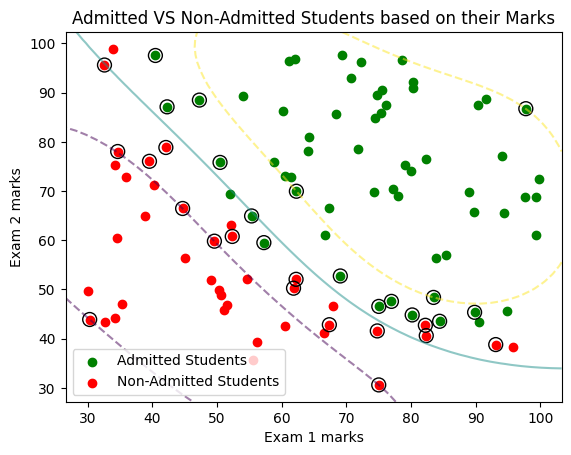

In [ ]:
plot_data()
plot_sv(model)

In [ ]:
def svm_params(X_train, y_train, X_test, y_test):
  kernel_types=['linear','poly','rbf']
  C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30] # regularisation parameters
  gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
  classifiers = {}
  max_score = 0

  for kernel in kernel_types:
    for C in C_values:
      for gamma in gamma_values:
        clf = svm.SVC(C=C, kernel=kernel, gamma=gamma)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        if score > max_score:
          max_score = score
          C_final = C
          gamma_final = gamma
          classifiers[kernel] = clf

    print(f"kernel = {kernel}, C = {C_final}, gamma = {gamma_final}, score = {max_score}")
    max_score = 0

  return classifiers


In [ ]:
classifiers = svm_params(X_train, y_train, X_test, y_test)

kernel = linear, C = 0.01, gamma = 0.01, score = 0.85
kernel = poly, C = 0.01, gamma = 0.01, score = 0.95
kernel = rbf, C = 1, gamma = 0.03, score = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-24-9af418dc1f5d>:13: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(XX, YY, Z, color='k', alpha=0.5, linestyles=['--','-','--'], levels=[-1,0,1])


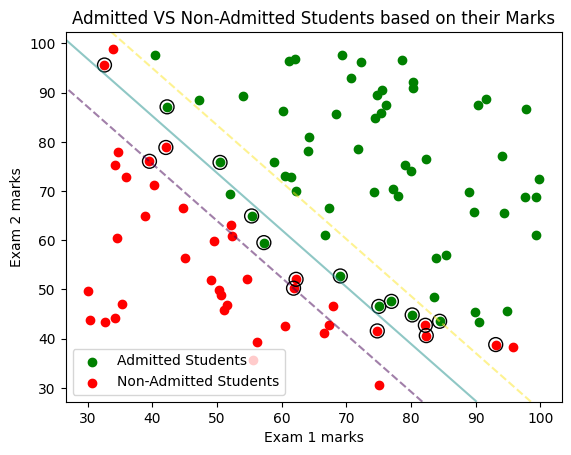

In [ ]:
# SVM with linear kernel
plot_data()
plot_sv(classifiers['linear'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-24-9af418dc1f5d>:13: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(XX, YY, Z, color='k', alpha=0.5, linestyles=['--','-','--'], levels=[-1,0,1])


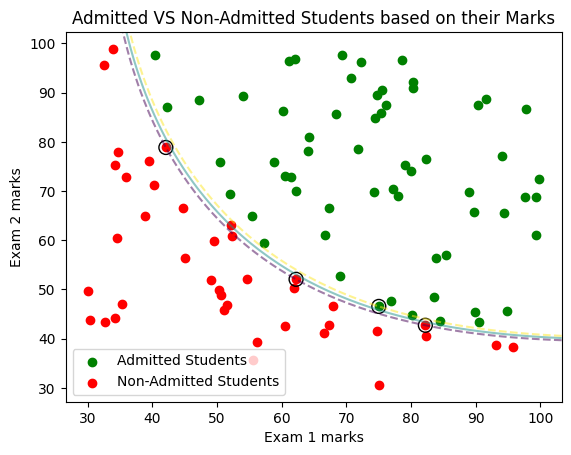

In [ ]:
# SVM with polynomial kernel
plot_data()
plot_sv(classifiers['poly'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-24-9af418dc1f5d>:13: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(XX, YY, Z, color='k', alpha=0.5, linestyles=['--','-','--'], levels=[-1,0,1])


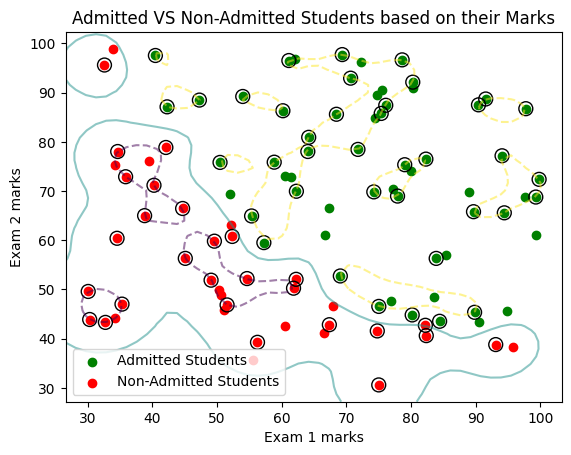

In [ ]:
# SVM with RBF kernel
plot_data()
plot_sv(classifiers['rbf'])